In [4]:
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use(['dark_background'])

https://moonvalley.guhsdaz.org/common/pages/DisplayFile.aspx?itemId=17682112

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366i.htm

https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/statistics/hypothesis-testing/hypothesis-testing-with-the-binomial-distribution.html#:~:text=To%20hypothesis%20test%20with%20the,we%20accept%20the%20alternative%20hypothesis.

https://influentialpoints.com/Training/binomial_and_related_tests-principles-properties-assumptions.htm

Assumptions for the Binomial Test (put at end)
- Items are dichotomous (i.e. there are two of them) and nominal (naming or labelling variables, without any quantitative value).
- The probability of a given outcome is the same for all n samples.
- The sample is a fair representation of the population.
    - technically thats what the governing assumption of a vote is...
    - doesn't necessarily have to be the case when comparing our first votes counted versus total votes though (Republicans may be morning people, or a larger Democratic county might have started counting earlier than all the others, or most pertinently, those of one political affiliation may vote by mail more readily). All of those examples could be influenced by confounding variables such as 
- Sample items are independent(one item has no bearing on the probability of another).
    - legally we have to assume this is the case

the issue really is that different counties skew more red or blue and each state has different protocols on when counting can start.  Also apparently mail-in ballots skew democrats which could either be counted before election night or after (some don't start until the day of, some allow for ballots to simply be post marked for the election day which means they could come in weeks later).

- matts ballot got put in a separate stack, that way he was a "new" voter... if they count the new voters together they could make an inference indep of others and use that to infer the final result
- this could probably be done at different polling sites too

We like to reform the problems so that they are simpler and similar to toy examples that we've studied extensively.  We have two classes: flipping a coin (rolling a die) or drawing from a bag of marbles. Turns out that these have names any the marble one converges on the coin flipping machine as number of marbles gets really large (most of our cases are this so we'll just move forward with this).  So we want to flip this coin a shitton of times and so what we're really interested in is whether or not its fair (our assumption is that its not obviously because someone has to win).

Each county has their own coin and this coin represents their leaning. They only get to flip it a certain number of times (more pop more flips).  We really might only be interested in a few of these coins because other ones are either really small or predictable

note that they really wanna get it right but also get it first (I imagine these are both marketing strategies that make it so they have to heavily rely on statistics)

Some counties count slower


This might be exponential. Let's say that in the worst case, the counties dont start absentee until day of and they count them half as fast as day-of votes.  If we don't assume that counties are uniform with each other and that 75+/-5% (diff for counties) of dems that vote are absentee vote and only 50+/-5% are republican... then we can watch the vote change from red to blue and we can see when the upp/low limits (see below) go above the line to win the state.

need to look up how fast votes can be counted to provide a distribution of how fast counties count

how long until we have an estimate of k for each county, and which counties do we need before we know for sure (i.e. do the other counties have enough to sway the remaining vote given their current positions - take worst/best case of each and add them up... in fact, I can do this for the whole sample and plot it with time, should be a line plot with 3 lines, 1 expected, 2 upp, 3 lower bounds and then of course the win line)

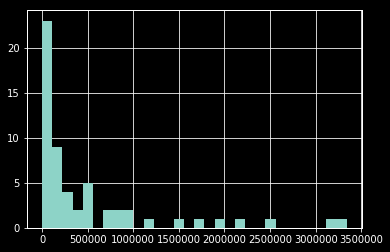

In [9]:
import pandas as pd
ca = pd.read_csv('CA_county_pops2019.csv')
ca.iloc[1:].Population.hist(bins=30)

given all the apprehension around vote counting and how long it will take, I'm curious how many votes you actually need to have counted before you know the results of an election. Below I have a super hacked together back of envelope example using inferential statistics which I find to have a lower barrier of entry for those outside the field.  Later I plan to follow up with a bayesian analysis as the problem lends itself nicer to this.  I think the main takeaway is that, given the results of this dirty approximation, you can assume that whoever developed the actual method for "when can we call a state" is a) probably pretty smart, b) ultra familiar with these types of problems (as opposed to my afternoon's worth of thinking about it) c) familiar with the tradeoffs and assumptions imposed by their calculations, d) as a result, worth listening to (even if media noise says otherwise).

I'm curious how they call an election early. Perhaps this isn't actually what they are doing but this is one method.  For simplicity's sake, there are only two candidates and you have 10000 total ballots and you've counted 5000 of them.  In order to win the election (whether its a state electorial vote or popular vote) you need to get the majority of the votes. Your current count is an estimate at 

In [26]:
# total ballots
N = 10000
# target ballets (need majority to win)
to_win = int(N // 2) + 1
# counted ballots
counted = 3000
# remaining ballots
remaining = N - counted
N, remaining, to_win

(10000, 7000, 5001)

Let's say that a vote for the incumbent candidate (i.e. the current president or his/her party) is a positive case and a vote for the challenger.  Let's say that we've already counted 7000 ballots, of which 55% were for the incumbent candidate.  

In [23]:
# percent of counted sample in favor of incumbent candidate (positive class)
p1 = 0.51 # this is also our estimate p-hat of parameter p of a binomial distribution
# votes for incumbent
v1 = int(p1 * counted)
v1

1530

This means that we can calculate how many votes the incumbent needs to recieve in order to guarentee his/her victory.  We can see that this is a much smaller percentage than the first sample approximated.

In [24]:
# how many more votes for incumbent to win
v2 = to_win - v1

# percent of remaining ballots required to win
p2 = v2/remaining
v2, p2

(3471, 0.49585714285714283)

So the question really becomes, what are the candidates' odds of NOT receiving 26% of the remaining vote given that they have already received. In this toy example, it means the incumbent would have to recieve less than 

In [25]:
p = p1
n = remaining
x = v2
scipy.stats.binom.cdf(x, n, p)

0.009265425664583174

bayesian: parameter of interest is p_hat, you're really interested in the prob dist (posterior) of p_hat given the data, see how much is hanging over 50%



p(A won | what I've seen), only god knows p before counting all the votes. p(A won) = p(p>0.5). Probability that a parameter takes on a certain value (essence of bayesian statistics). The output that you get at the end is a probability dist of your unknown parameter (thats call posterior dist). so then how much of hist is above 50%. 

 posterior for a binomial p follows a beta distribution. And the beta dist has two parameters :  alpah and beta are both functions of n and x (data you collected). Find cdf of beta > 0.5.

https://en.wikipedia.org/wiki/Conjugate_prior

caveat: 
- none of this is right, bc this is a survey. In survey stats, things get weird.  Population is finite in size (not infinite). There is actually a real number of votes for candidate A and B (not the same thing as a coin flipping machine which asymptotes at p as n goes bigger).  The uncertainty of our estimate of our parameter values is based on how much we've sampled.  Lets say you've sampled 9 of 10 people. Our estimate is way better than we think it would be given conventional statistical methods. The more votes you have, the less useful the inference is.  But we are talking about a time when we don't have that many votes so its cool (not in the regime where this messes with it)

would have to hack this... would have to calc a confidence interval on phat and plug in the bounds and then its giving me the bounds. If the final prob is above 50 we care about lower half and if its below 50 then we care about upper half.  If you look at the proper bound, lets say its p_lower (they are winning), then back out what it will take for him to win... make sure that's greater than 95% before shading in the state

should probably

Many interesting ways to approximate the confidence interval of the p parameter of a binomial distribution. I chose the simplest. https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#:~:text=In%20statistics%2C%20a%20binomial%20proportion,failure%20experiments%20(Bernoulli%20trials).&text=The%20observed%20binomial%20proportion%20is,turn%20out%20to%20be%20heads.

In [159]:
def calc_CI95(p1, N, eps = 1e-15):
    # z score given an alpha of 0.05 (two tailed)
    z = 1.96
    z = 2.576 #99%
    # normal approximation using CLT
    interval = z * np.sqrt(p1 * (1 - p1) / N)
    # upper lower bounds are just +/- above
    upper = p1 + interval
    lower = p1 - interval
    # bound them to (0,1)
    upper = 1 - eps if upper > 1 else upper
    lower = 0 + eps if lower < 0 else lower
    return upper, lower

calc_CI95(0.9,200)

(0.9546452120500964, 0.8453547879499036)

Plotting binomial, you can see that our approximation of the CI pretty well bounds the uncertainty in the measurement

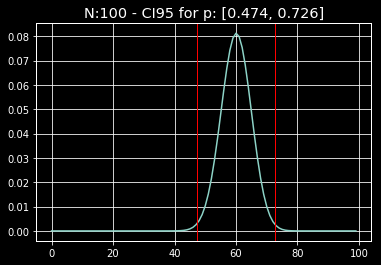

In [208]:
def plot_binomial_pmf(p, N, step=1, CI95 = True, ax = None):
    if ax is None:
        plt.figure()
        ax = plt.gca() 
    x = np.arange(0, N, step = step)
    y = scipy.stats.binom.pmf(x, N, p)
    ax.plot(x,y)
    # plot the means of the resulting binomial dist using p_hat as the upper or lower CI's
    if CI95:
        p_high, p_low = calc_CI95(p,N)
        for bound in (p_high, p_low): ax.axvline(bound * N, c='r', linewidth = 1)
        ax.set_title(f'N:{N} - CI95 for p: {[np.round(p_low,3), np.round(p_high,3)]}')
    return ax

plot_binomial_pmf(p=0.6, N = 100)

We can see that the conf intervals on p shrink as we increase N.  Again, this is all assuming that we don't know p and we're approximating it with some p_hat that we calculated with N independent bernoulli trials.

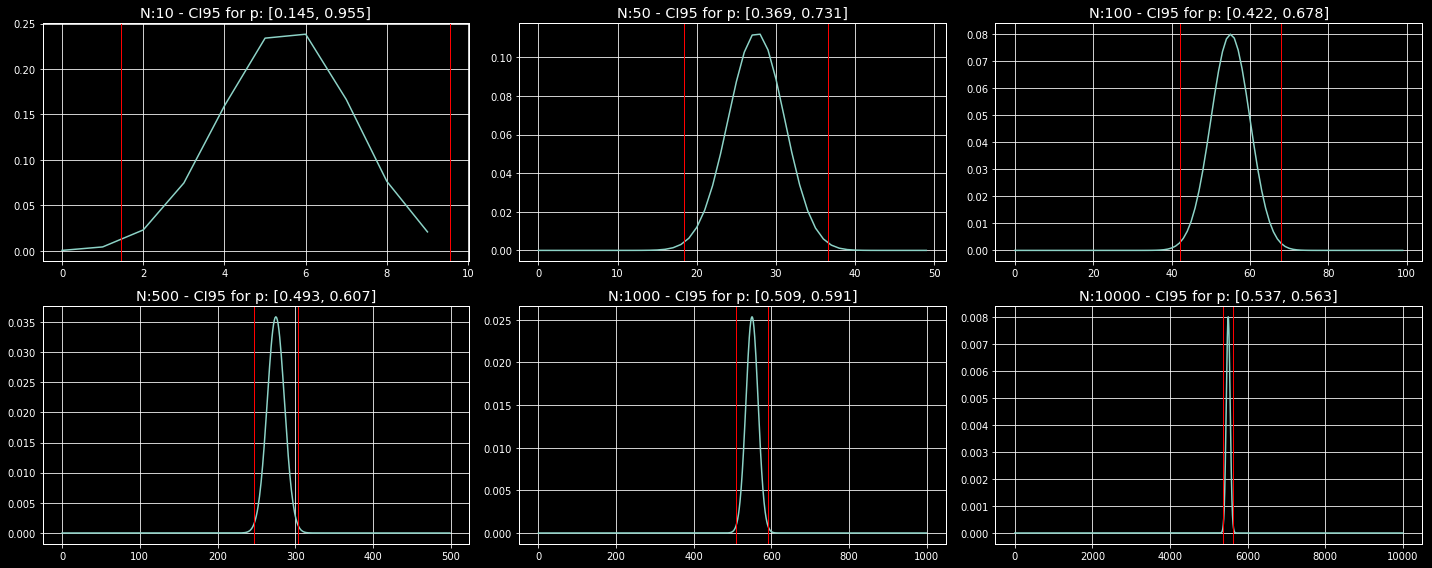

In [209]:
Ns = [10, 50, 100, 500, 1000, 10000]
p = 0.55
fig, axs = plt.subplots(2, len(Ns)//2, figsize = (20,8))

for i,N in enumerate(Ns):
    # find the appropriate subplot (please someone tell me a better way to do this)
    row = 0 if i < len(Ns)//2 else 1
    col = i if row == 0 else i - len(Ns)//2
    ax = axs[row,col]
    # plot the current N
    plot_binomial_pmf(p=p, N = N, ax = ax)
plt.tight_layout()

So lets attempt at this thing

In [212]:
def calc_p_of_loss(v1 = None, p1 = None, counted = 3000, N = 10000):
    # allow for either v1 or p1 to be given, if v1 is given p1 is ignored
    v1 = v1 if v1 is not None else int(p1 * counted)
    p1 = p1 if v1 is None else v1/counted
    print(f'Incumbent has won {v1} votes of the first {counted} votes which is {p1*100}% of that sample')
    
    # target ballets (need majority to win)
    to_win = int(N // 2) + 1
    # remaining ballots
    remaining = N - counted
    print(f'Since they need {to_win} votes of {N} total votes,')
    
    # how many more votes for incumbent to win
    v2 = to_win - v1
    p2 = v2 / remaining
    print(f'They need to collect {v2} of the remaingin {remaining} votes ({p2*100}%)')
    
    # calculate the probability that they will recieve less than that many votes
    v2_loss = v2 - 1
    
    p_high, p_low = calc_CI95(p1,N)
    print(p_high, p_low)
    prob_loss_upper = scipy.stats.binom.cdf(v2_loss, remaining, p_high)
    prob_loss_lower = scipy.stats.binom.cdf(v2_loss, remaining, p_low)

    prob_win_upper, prob_win_lower = 1 - prob_loss_lower, 1 - prob_loss_upper
    
    p = p_high if p1 > 0.5 else p_low
    print(p)
    ax = plot_binomial_pmf(p=p, N = remaining, CI95=False)
    ax.axvline(v2_loss,c='r')
    
    return prob_win_upper, prob_win_lower

Incumbent has won 501 votes of the first 1000 votes which is 50.1% of that sample
Since they need 5001 votes of 10000 total votes,
They need to collect 4500 of the remaingin 9000 votes (50.0%)
0.5138799742399742 0.4881200257600258
0.5138799742399742


(0.012419220182048107, 0.9959113747117251)

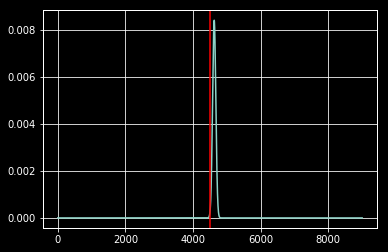

In [214]:
counted = 1000
# N = counted * 5
N = 10000
calc_p_of_loss(p1 = 0.501, counted= counted, N = N )

In [186]:
494901/990000

0.4999

This is without conf interval thing

In [80]:
def calc_p_of_loss(v1 = None, p1 = None, counted = 3000, N = 10000):
    # allow for either v1 or p1 to be given, if v1 is given p1 is ignored
    v1 = v1 if v1 is not None else int(p1 * counted)
    p1 = p1 if v1 is None else v1/counted
    print(f'Incumbent has won {v1} votes of the first {counted} votes which is {p1*100}% of that sample')
    
    # target ballets (need majority to win)
    to_win = int(N // 2) + 1
    # remaining ballots
    remaining = N - counted
    print(f'Since they need {to_win} votes of {N} total votes,')
    
    # how many more votes for incumbent to win
    v2 = to_win - v1
    print(f'They need to collect {v2} of the remaingin {remaining} votes')
    
    # calculate the probability that they will recieve less than that many votes
    v2_loss = v2 - 1
    prob_loss = scipy.stats.binom.cdf(v2_loss, remaining, p1)
    print(f'This gives them a {np.round((1-prob_loss)*100,3)}% chance of winning')
    return prob_loss

calc_p_of_loss(p1 = 0.5,counted= 100)

Incumbent has won 50 votes of the first 100 votes which is 50.0% of that sample
Since they need 5001 votes of 10000 total votes,
They need to collect 4951 of the remaingin 9900 votes
This gives them a 49.599% chance of winning


0.5040094195327363